In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sklearn
from sklearn.metrics import classification_report,precision_recall_curve,plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The scikit-learn version is {}.'.format(pd.__version__))

The scikit-learn version is 0.22.2.
The scikit-learn version is 1.0.3.


In [3]:
df_obj=pd.read_csv(filepath_or_buffer='https://storage.googleapis.com/industryanalytics/trans_fraud_data.csv')

In [4]:
df_obj.shape

(6362620, 10)

In [5]:
df_obj.describe()

,step,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [6]:
df_obj.head()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [7]:
def return_explode_list(explode_count):
    explode_List=[]
    for i in range(0,explode_count):
        if i%2==0:
            explode_List.append(.1)
        else:
            explode_List.append(0)
    return explode_List


In [8]:
def plot_categorical_value_distribution(data,column_name,disp_column_name):
    total_unique_value=data[column_name].value_counts().shape[0]
    available_color_list_values=list(sns.crayons.values())
    colors_list = random.choices(available_color_list_values,k=total_unique_value)
    figure = plt.figure(figsize = [13.66, 7.3])
    plt.subplot(1, 2, 1)
    
    ax=sns.barplot(data[column_name].value_counts().index, data[column_name].value_counts(), palette  = colors_list)
#     plt.yticks(range(0, 2300000, 100000))
    plt.xlabel(disp_column_name, size = 14)
    plt.ylabel('Frequency', size = 14)
    plt.title('Frequency occurence of each '+ disp_column_name, y=1.05, size = 16)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+.5))

    explode_list=return_explode_list(total_unique_value)
    plt.subplot(1, 2, 2)
    data[column_name].value_counts().plot(kind='pie', figsize=[13.66, 7.3], autopct='%1.1f%%', 
                                           startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
    plt.title('Proportion of each type occurence in '+ disp_column_name, y=1.05, size = 16)
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(labels = data[column_name].value_counts().index, loc = 'upper left', frameon=False)
    plt.tight_layout(pad=2.0)
    plt.show()

In [9]:
available_color_list_values=list(sns.crayons.values())

**Question:** Find the **frequency** and **proportions** of various **categorcal values** in Data?

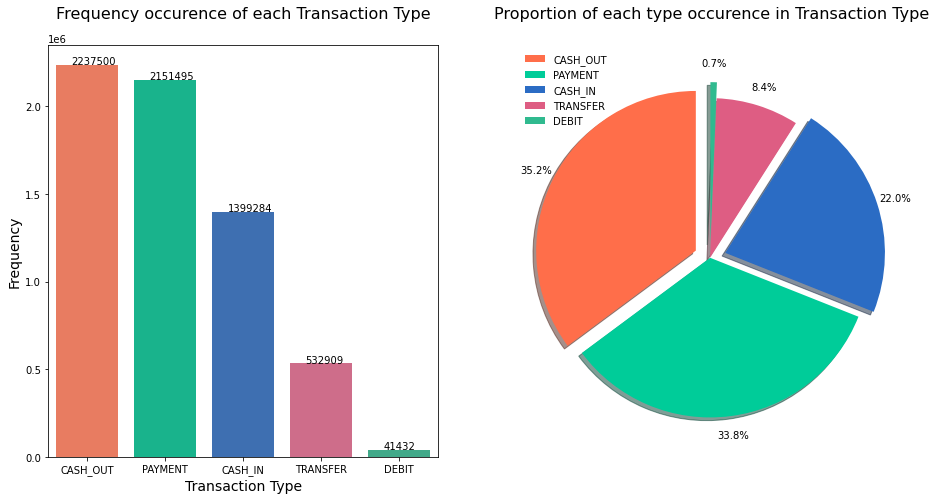

In [10]:
plot_categorical_value_distribution(df_obj,"trans_type","Transaction Type")

**<h4>Question 2:** What is the **average amount** that has been **transfered** using **each transaction type**?</h4>

In [11]:
df_avg_amt_transtype=pd.DataFrame(df_obj.groupby("trans_type").mean()["trans_amount"].reset_index())
df_avg_amt_transtype.set_index("trans_type",inplace=True)

In [12]:
df_avg_amt_transtype["trans_amount"]=round(df_avg_amt_transtype["trans_amount"],2)

In [13]:
df_avg_amt_transtype["trans_amount"].sum()

1274382.48

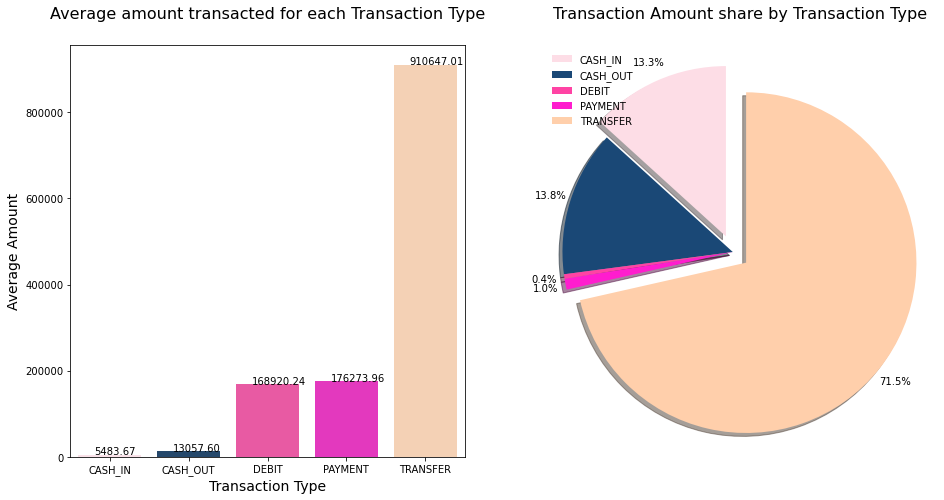

In [14]:
    figure = plt.figure(figsize = [13.66, 7.3])
    plt.subplot(1, 2, 1)
    colors_list = random.choices(available_color_list_values,k=5)

    ax=sns.barplot(df_avg_amt_transtype.index, df_avg_amt_transtype["trans_amount"].sort_values(), palette=colors_list )
    plt.xlabel("Transaction Type", size = 14)
    plt.ylabel('Average Amount', size = 14)
    plt.title('Average amount transacted for each Transaction Type', y=1.05, size = 16)
    for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+.8))

    explode_list=[.1,0,0,0,.1]
    plt.subplot(1, 2, 2)
    df_avg_amt_transtype["trans_amount"].plot(kind='pie', figsize=[13.66, 7.3], autopct='%1.1f%%', 
                                           startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
    plt.title('Transaction Amount share by Transaction Type', y=1.05, size = 16)
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(labels = df_avg_amt_transtype.index, loc = 'upper left', frameon=False)
    plt.tight_layout(pad=2.0)
    plt.show()

**<h4>Question 3:** What is the **proportion of customers who are fraud and who are not**?</h4>

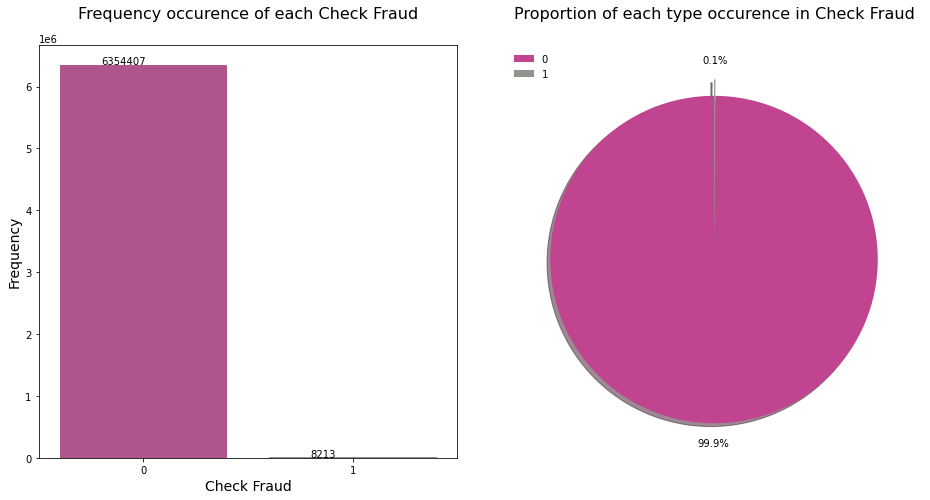

In [15]:
plot_categorical_value_distribution(df_obj,"check_fraud","Check Fraud")

**<h4>* Question 4:** What is the **frequency distribution of transactions types** happened **with respect to customer being fraud**?</h4> 

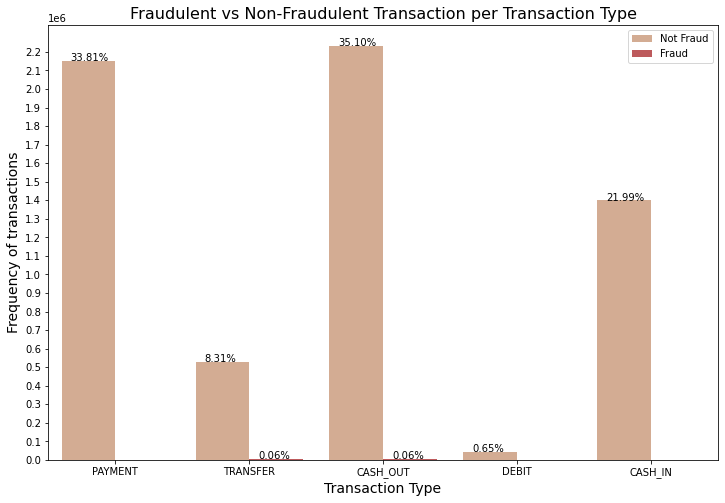

In [16]:
plt.figure(figsize = [12, 8])
ax = sns.countplot(x = 'trans_type', hue = 'check_fraud', data = df_obj, palette = random.choices(available_color_list_values,k=2))
total = df_obj.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width() / 6
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))
ax.set_yticks(range(0, 2300000, int(1e5)))
ax.set_xlabel("Transaction Type", size = 14)
ax.set_ylabel("Frequency of transactions", size = 14)
ax.set_title("Fraudulent vs Non-Fraudulent Transaction per Transaction Type", size = 16)
ax.legend(labels = ['Not Fraud', 'Fraud'])
plt.show()

**<h4>Question 5:** What is the **minimumn & maximum transaction amount identified as fraudulent** transaction?</h4>



In [17]:
min_amount=df_obj[df_obj["check_fraud"]==1]["trans_amount"].min()
max_amount=df_obj[df_obj["check_fraud"]==1]["trans_amount"].max()
print('Minimum amount transacted as fraudulent =', min_amount)
print('Maximum amount transacted as fraudulent =', max_amount)

Minimum amount transacted as fraudulent = 0.0
Maximum amount transacted as fraudulent = 10000000.0


**<h4>Question 6:** What is the **minimumn & maximum transaction amount identified as non-fraudulent** transaction?</h4>

In [18]:
min_amount=df_obj[df_obj["check_fraud"]==0]["trans_amount"].min()
max_amount=df_obj[df_obj["check_fraud"]==0]["trans_amount"].max()
print('Minimum amount transacted as fraudulent =', min_amount)
print('Maximum amount transacted as fraudulent =', max_amount)

Minimum amount transacted as fraudulent = 0.01
Maximum amount transacted as fraudulent = 92445516.64


In [19]:
df_obj.drop(["sender_name","receiver"],inplace=True,axis=1) #"Unnamed: 0"

In [20]:
# sns.heatmap(df_obj.corr(),annot=True,cmap="YlOrRd")

In [21]:
# receiver_old_bal and receiver_new_bal are highly correalted. So any one of them can be dropped p=.98
# sender_old_bal and sender_new_bal are highly correlated. So any of them can be dropped
df_obj.drop(["receiver_new_bal","sender_new_bal"],axis=1,inplace=True)

In [22]:
df_trasfer_cashout_data=df_obj[(df_obj["trans_type"]=="TRANSFER") | (df_obj["trans_type"]=="CASH_OUT")]

In [23]:
df_trasfer_cashout_data.head()

,step,trans_type,trans_amount,sender_old_bal,receiver_old_bal,check_fraud
2,1,TRANSFER,181.00,181.0,0.0,1
3,1,CASH_OUT,181.00,181.0,21182.0,1
15,1,CASH_OUT,229133.94,15325.0,5083.0,0
19,1,TRANSFER,215310.30,705.0,22425.0,0
24,1,TRANSFER,311685.89,10835.0,6267.0,0


In [24]:
# sns.pairplot(data=df_trasfer_cashout_data,hue="check_fraud")

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [26]:
log_class=LogisticRegression()
neigh_class=KNeighborsClassifier(n_neighbors=40)
svr_class=SVR()
dec_tree_class=DecisionTreeClassifier()
random_frst_class=RandomForestClassifier(n_estimators=100)
xg_boost_class=XGBClassifier()

In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
df_trasfer_cashout_data=pd.get_dummies(df_trasfer_cashout_data,columns=["trans_type"],drop_first=True)

In [29]:
df_trasfer_cashout_data.head()

,step,trans_amount,sender_old_bal,receiver_old_bal,check_fraud,trans_type_TRANSFER
2,1,181.00,181.0,0.0,1,1
3,1,181.00,181.0,21182.0,1,0
15,1,229133.94,15325.0,5083.0,0,0
19,1,215310.30,705.0,22425.0,0,1
24,1,311685.89,10835.0,6267.0,0,1


In [30]:
y=df_trasfer_cashout_data["check_fraud"]
X=df_trasfer_cashout_data.drop("check_fraud",axis=1)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [32]:
def predict_value(estimator,X_train,y_train,X_test,y_test):
    print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
    std_sclr=StandardScaler()
    X_train_scled=std_sclr.fit_transform(X_train)
    X_test_scled=std_sclr.transform(X_test)
    estimator.fit(X_train_scled,y_train)    
    y_predict=estimator.predict(X_test_scled)
    print(classification_report(y_pred=y_predict,y_true=y_test))
    plot_precision_recall_curve(estimator,X_test_scled,y_test)
    print("************************************************")

    

(1939286, 5) (1939286,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.83      0.22      0.35      2496

    accuracy                           1.00    831123
   macro avg       0.91      0.61      0.68    831123
weighted avg       1.00      1.00      1.00    831123

************************************************


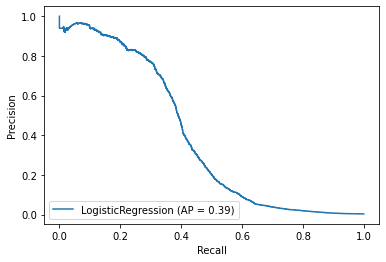

In [33]:
predict_value(log_class,X_train,y_train,X_test,y_test)

In [34]:
from collections import Counter

In [37]:
smote_obj=SMOTE(sampling_strategy=.5,random_state=42,k_neighbors=5)
X_train_smote,y_train_smote=smote_obj.fit_resample(X_train,y_train)
print(Counter(y_train_smote))

Counter({0: 1933569, 1: 966784})


(2900353, 5) (2900353,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    828627
           1       0.05      0.78      0.09      2496

    accuracy                           0.95    831123
   macro avg       0.52      0.87      0.53    831123
weighted avg       1.00      0.95      0.97    831123

************************************************


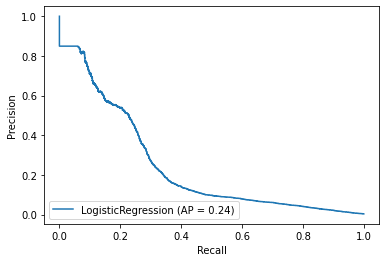

In [38]:
log_smote_obj=LogisticRegression()
predict_value(log_smote_obj,X_train_smote,y_train_smote,X_test,y_test)

(1939286, 5) (1939286,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.93      0.71      0.80      2496

    accuracy                           1.00    831123
   macro avg       0.97      0.85      0.90    831123
weighted avg       1.00      1.00      1.00    831123

************************************************


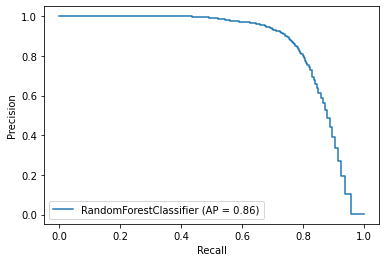

In [39]:
predict_value(random_frst_class,X_train,y_train,X_test,y_test)


In [61]:
# df_obj.columns
df1=pd.DataFrame(random_frst_class.feature_importances_,index=X.columns)
df1

,0
step,0.205161
trans_amount,0.309242
sender_old_bal,0.367594
receiver_old_bal,0.071370
trans_type_TRANSFER,0.046632


(2900353, 5) (2900353,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.50      0.94      0.65      2496

    accuracy                           1.00    831123
   macro avg       0.75      0.97      0.82    831123
weighted avg       1.00      1.00      1.00    831123

************************************************


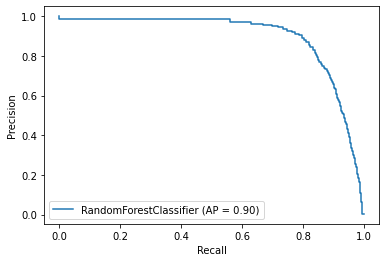

In [40]:
rndm_class_smote=RandomForestClassifier(n_estimators=100)
predict_value(rndm_class_smote,X_train_smote,y_train_smote,X_test,y_test)


In [62]:
print(pd.DataFrame(rndm_class_smote.feature_importances_,index=X.columns))

                            0
step                 0.115319
trans_amount         0.251245
sender_old_bal       0.441161
receiver_old_bal     0.150995
trans_type_TRANSFER  0.041280


(1939286, 5) (1939286,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.90      0.43      0.58      2496

    accuracy                           1.00    831123
   macro avg       0.95      0.72      0.79    831123
weighted avg       1.00      1.00      1.00    831123

************************************************


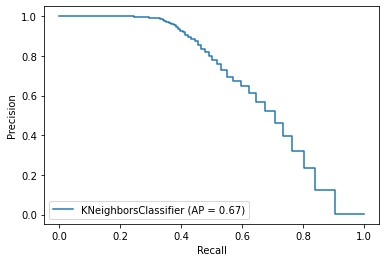

In [41]:
predict_value(neigh_class,X_train,y_train,X_test,y_test)

(2900353, 5) (2900353,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    828627
           1       0.11      0.94      0.20      2496

    accuracy                           0.98    831123
   macro avg       0.55      0.96      0.59    831123
weighted avg       1.00      0.98      0.99    831123

************************************************


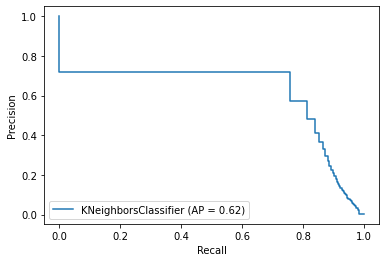

In [42]:
neigh_class_smote=KNeighborsClassifier(n_neighbors=40)
predict_value(neigh_class_smote,X_train_smote,y_train_smote,X_test,y_test)

In [43]:
xgboost_class=XGBClassifier()

(1939286, 5) (1939286,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.95      0.81      0.88      2496

    accuracy                           1.00    831123
   macro avg       0.97      0.91      0.94    831123
weighted avg       1.00      1.00      1.00    831123

************************************************


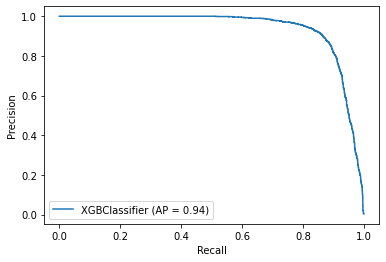

In [44]:
predict_value(xgboost_class,X_train,y_train,X_test,y_test)

(2900353, 5) (2900353,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    828627
           1       0.28      0.99      0.43      2496

    accuracy                           0.99    831123
   macro avg       0.64      0.99      0.72    831123
weighted avg       1.00      0.99      0.99    831123

************************************************


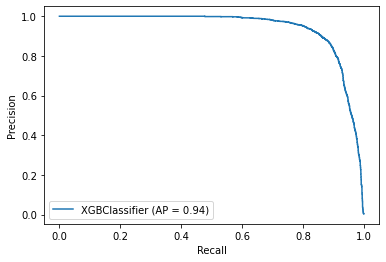

In [45]:
predict_value(xg_boost_class,X_train_smote,y_train_smote,
              X_test,y_test)

In [49]:
log_stk_class=LogisticRegression()
neigh_stk_class=KNeighborsClassifier(n_neighbors=40)
decision_tree_stk_class=DecisionTreeClassifier()
svm_stk_class=SVC()

In [52]:
stacking_class=StackingClassifier([neigh_stk_class,decision_tree_stk_class,svm_stk_class],final_estimator=log_stk_class)

In [53]:
stacking_class.fit(X_train,y_train)

TypeError: zip argument #1 must support iteration

In [63]:
from sklearn.ensemble import BaggingClassifier

In [64]:
bag_Class=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42)

(1939286, 5) (1939286,) (831123, 5) (831123,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.93      0.74      0.82      2496

    accuracy                           1.00    831123
   macro avg       0.96      0.87      0.91    831123
weighted avg       1.00      1.00      1.00    831123

************************************************


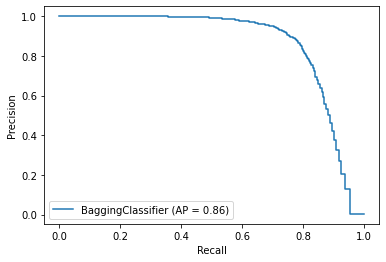

In [67]:
predict_value(bag_Class,X_train,y_train,X_test,y_test)

In [68]:
bag_Class=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=50),n_estimators=100,random_state=42)

In [ ]:
predict_value(bag_Class,X_train,y_train,X_test,y_test)

(1939286, 5) (1939286,) (831123, 5) (831123,)
